In [1]:
import pandas  as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf 
from tensorflow import keras


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

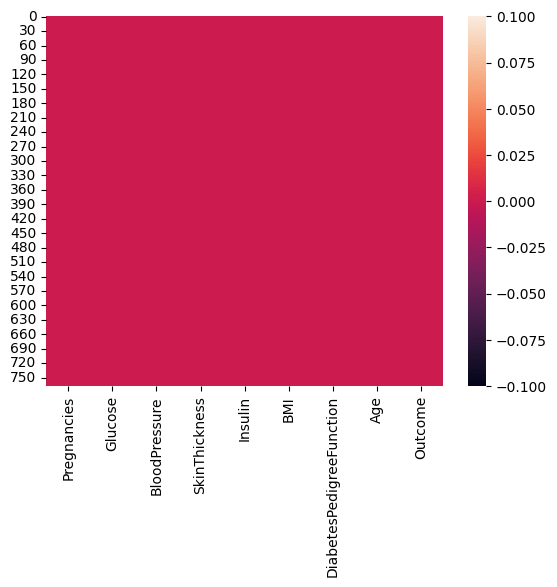

In [4]:
sns.heatmap(df.isna())

In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Text(0, 0.5, 'Age')

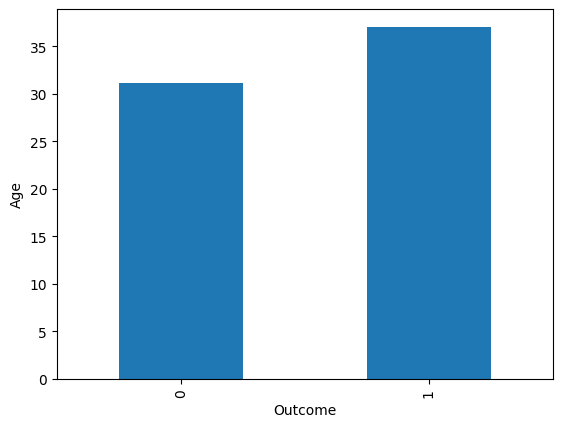

In [8]:
df.groupby('Outcome')['Age'].mean().plot(kind='bar');
plt.ylabel('Age')


Text(0, 0.5, 'Glucose')

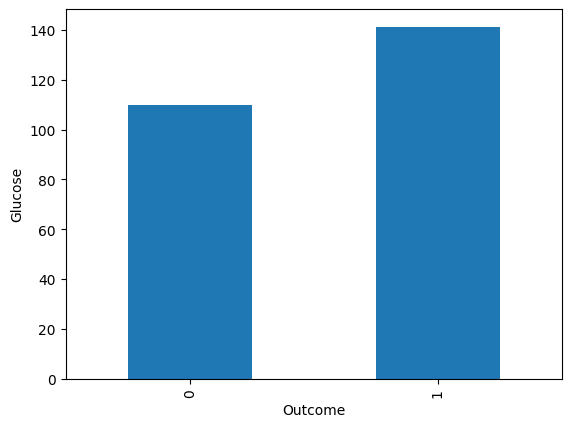

In [9]:
df.groupby('Outcome')['Glucose'].mean().plot(kind='bar');
plt.ylabel('Glucose')


<Axes: xlabel='Pregnancies', ylabel='count'>

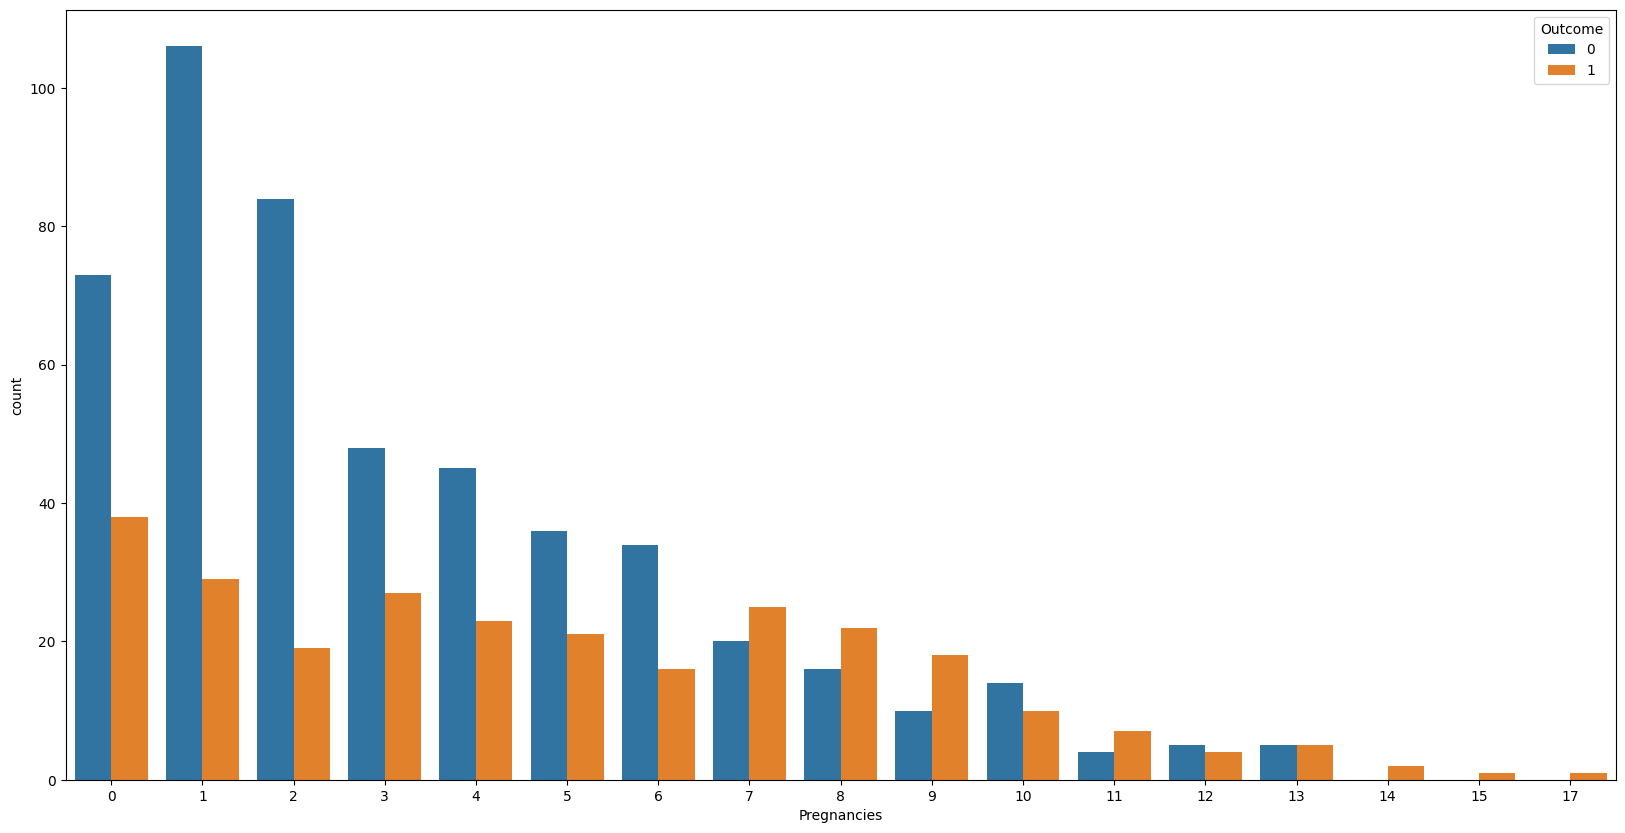

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Pregnancies',hue='Outcome')

### Splitting tha data 

In [11]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [13]:
np.random.seed(1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1,stratify=y)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(691, 8) (77, 8) (77,) (691,)


In [14]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler() 
X_train_scaled=MMS.fit_transform(X_train)
X_test_scaled=MMS.transform(X_test)
X_train_scaled.shape

(691, 8)

In [15]:
model=LogisticRegression().fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6623376623376623

In [16]:
Model3=DecisionTreeClassifier().fit(X_train,y_train)
Model3.score(X_test,y_test)

0.6623376623376623

In [17]:
y_predictd=model.predict(X_test)
y_predictd

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
accuracy_score(y_predictd,y_test)

0.6623376623376623

In [19]:
Model=keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(4,activation='relu'), 
    keras.layers.Dense(1,activation='sigmoid')
])

Model.compile(
    metrics=['accuracy'], 
    loss='binary_crossentropy', 
    optimizer='adam'
)

Model.fit(X_train,y_train,epochs=1000)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4465 - loss: 6.6325
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4643 - loss: 4.0787
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6344 - loss: 4.2092
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6133 - loss: 2.9087 
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6066 - loss: 2.7465 
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6187 - loss: 2.3106
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6472 - loss: 2.2682
Epoch 8/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6351 - loss: 1.8248 
Epoch 9/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 1.5338 
Epoch 10/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - loss: 1.2275 
Epoch 11/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6266 - loss: 1.2832 
Epoch 12/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [20]:
Model.evaluate(X_train,y_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7742 - loss: 0.4529  


[0.46477627754211426, 0.7785817384719849]

In [21]:
Model.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7230 - loss: 0.6356 


[0.6492708921432495, 0.7272727489471436]

In [22]:
Model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(4,activation='relu'), 
    keras.layers.Dense(1,activation='sigmoid')
])

Model2.compile(
    metrics=['accuracy'], 
    loss='binary_crossentropy', 
    optimizer='adam'
)

Model2.fit(X_train_scaled,y_train,epochs=1000)

Epoch 1/1000


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3557 - loss: 0.7353
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3624 - loss: 0.7137 
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3731 - loss: 0.7026 
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5282 - loss: 0.6943 
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6974 - loss: 0.6862 
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6826 - loss: 0.6826 
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6510 - loss: 0.6780 
Epoch 8/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - loss: 0.6750 
Epoch 9/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - loss: 0.6720 
Epoch 10/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 0.6689 
Epoch 11/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6706 - loss: 0.6670 
Epoch 12/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

In [23]:
Model2.evaluate(X_train_scaled,y_train)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7991 - loss: 0.4301  


[0.4416121542453766, 0.7973950505256653]

In [24]:
Model2.evaluate(X_test_scaled,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6736 - loss: 0.6692 


[0.6683588624000549, 0.6753246784210205]

In [25]:
y_pred=Model.predict(X_test)
y_pred[:6]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.35062677],
       [0.857304  ],
       [0.91281664],
       [0.36283743],
       [0.08376139],
       [0.10966047]], dtype=float32)

In [26]:
y_predicted=[]
for i in y_pred:
    if i<=0.5:
        y_predicted.append(0)
    else:
       y_predicted.append(1)
y_predicted[:5]

[0, 1, 1, 0, 0]

In [27]:
import pickle
file = open('Diabetes_prediction.pkl', 'wb')
pickle.dump(Model,file)

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        59
           1       0.44      0.67      0.53        18

    accuracy                           0.73        77
   macro avg       0.66      0.71      0.67        77
weighted avg       0.78      0.73      0.74        77



In [29]:
cm=confusion_matrix(y_predicted,y_test)

<Axes: >

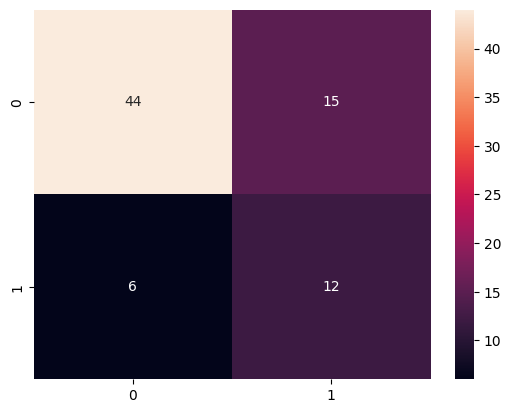

In [30]:
sns.heatmap(cm,annot=True)